# Supermarket Sales Analysis 


In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:

df = pd.read_csv('supermarket_sales_500.csv')



 ### Basic information

In [25]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer Type', 'Gender',
       'Product Line', 'Unit Price', 'Quantity', 'Date', 'Time', 'Payment',
       'Rating', 'Tax', 'Total'],
      dtype='object')

In [26]:
print(df.isnull().sum())

Invoice ID       0
Branch           0
City             0
Customer Type    0
Gender           0
Product Line     0
Unit Price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
Tax              0
Total            0
dtype: int64


In [27]:

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     500 non-null    object 
 1   Branch         500 non-null    object 
 2   City           500 non-null    object 
 3   Customer Type  500 non-null    object 
 4   Gender         500 non-null    object 
 5   Product Line   500 non-null    object 
 6   Unit Price     500 non-null    float64
 7   Quantity       500 non-null    int64  
 8   Date           500 non-null    object 
 9   Time           500 non-null    object 
 10  Payment        500 non-null    object 
 11  Rating         500 non-null    float64
 12  Tax            500 non-null    float64
 13  Total          500 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 54.8+ KB


In [28]:
print( df.duplicated().sum())

0


In [29]:

df.describe()

,Unit Price,Quantity,Rating,Tax,Total
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,56.475260,4.978000,7.495600,14.206740,298.341840
std,25.942595,2.575808,1.442839,10.688232,224.451643
min,10.040000,1.000000,5.000000,0.530000,11.130000
25%,34.037500,3.000000,6.200000,4.975000,104.415000
50%,58.580000,5.000000,7.400000,11.130000,233.715000
75%,78.690000,7.000000,8.800000,20.895000,438.795000
max,99.960000,9.000000,10.000000,44.260000,929.410000


##  Data Cleaning

Fill numeric missing values with mean
**   Fill categorical missing values with mode
**   Parse Date and Time, extract Hour
**   Remove duplicates
**   Inspect remaining problematic rows (if any)


In [30]:
#  Handle missing values
num_cols = ['Unit Price', 'Quantity', 'Tax', 'Total', 'Rating']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())
cat_cols = ['Branch','City','Customer Type','Gender','Product Line','Payment']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


In [31]:
# Remove duplicates
df = df.drop_duplicates()

df

,Invoice ID,Branch,City,Customer Type,Gender,Product Line,Unit Price,Quantity,Date,Time,Payment,Rating,Tax,Total
0,202-61-1860,A,Naypyitaw,Member,Female,Health and beauty,83.93,9,2023-01-01,14:15,Ewallet,8.5,37.77,793.14
1,370-81-6734,C,Naypyitaw,Member,Female,Fashion accessories,59.92,1,2023-01-02,12:45,Ewallet,5.7,3.00,62.92
2,221-92-5426,B,Mandalay,Normal,Female,Food and beverages,67.34,1,2023-01-03,9:00,Cash,7.1,3.37,70.71
3,558-97-9322,A,Mandalay,Member,Male,Sports and travel,57.37,4,2023-01-04,13:00,Ewallet,7.7,11.47,240.95
4,761-62-1769,C,Yangon,Member,Female,Food and beverages,51.69,7,2023-01-05,16:45,Ewallet,7.0,18.09,379.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,160-52-5805,C,Yangon,Member,Male,Sports and travel,29.18,7,2024-05-10,20:45,Ewallet,5.3,10.21,214.47
496,906-65-8486,B,Yangon,Normal,Female,Health and beauty,94.52,1,2024-05-11,15:00,Cash,7.0,4.73,99.25
497,401-97-9202,B,Mandalay,Normal,Male,Sports and travel,10.60,1,2024-05-12,8:00,Credit card,8.4,0.53,11.13
498,161-86-8878,A,Mandalay,Normal,Male,Electronic accessories,79.51,7,2024-05-13,11:45,Cash,7.3,27.83,584.40


In [32]:
# Parse Date
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df

,Invoice ID,Branch,City,Customer Type,Gender,Product Line,Unit Price,Quantity,Date,Time,Payment,Rating,Tax,Total
0,202-61-1860,A,Naypyitaw,Member,Female,Health and beauty,83.93,9,2023-01-01,14:15,Ewallet,8.5,37.77,793.14
1,370-81-6734,C,Naypyitaw,Member,Female,Fashion accessories,59.92,1,2023-01-02,12:45,Ewallet,5.7,3.00,62.92
2,221-92-5426,B,Mandalay,Normal,Female,Food and beverages,67.34,1,2023-01-03,9:00,Cash,7.1,3.37,70.71
3,558-97-9322,A,Mandalay,Member,Male,Sports and travel,57.37,4,2023-01-04,13:00,Ewallet,7.7,11.47,240.95
4,761-62-1769,C,Yangon,Member,Female,Food and beverages,51.69,7,2023-01-05,16:45,Ewallet,7.0,18.09,379.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,160-52-5805,C,Yangon,Member,Male,Sports and travel,29.18,7,2024-05-10,20:45,Ewallet,5.3,10.21,214.47
496,906-65-8486,B,Yangon,Normal,Female,Health and beauty,94.52,1,2024-05-11,15:00,Cash,7.0,4.73,99.25
497,401-97-9202,B,Mandalay,Normal,Male,Sports and travel,10.60,1,2024-05-12,8:00,Credit card,8.4,0.53,11.13
498,161-86-8878,A,Mandalay,Normal,Male,Electronic accessories,79.51,7,2024-05-13,11:45,Cash,7.3,27.83,584.40


In [33]:
# Clean Time and extract Hour
if 'Time' in df.columns:
    df['Time_str'] = df['Time'].astype(str).str.strip()
    df['Time_clean'] = df['Time_str'].str.extract(r'(\d{1,2}:\d{2})')[0]
    df['Time_parsed'] = pd.to_datetime(df['Time_clean'], format='%H:%M', errors='coerce')
    df['Hour'] = df['Time_parsed'].dt.hour




In [34]:
#  Create features
if 'Date' in df.columns:
    df['Day'] = df['Date'].dt.day_name()
    df['Month'] = df['Date'].dt.month_name()
    df['IsWeekend'] = df['Day'].isin(['Saturday','Sunday'])



In [35]:
# PartOfDay
if 'Hour' in df.columns:
    df['PartOfDay'] = pd.cut(df['Hour'],
                            bins=[0,12,17,21,24],
                            labels=['Morning','Afternoon','Evening','Night'],
                            right=False)
else:
    df['PartOfDay'] = np.nan



In [36]:
# Sales per unit and high rating flag
if 'Total' in df.columns and 'Quantity' in df.columns:
    df['SalesPerUnit'] = df['Total'] / df['Quantity']
if 'Rating' in df.columns:
    df['HighRating'] =df['Rating'] >= 8

df.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Line,Unit Price,Quantity,Date,Time,...,Time_str,Time_clean,Time_parsed,Hour,Day,Month,IsWeekend,PartOfDay,SalesPerUnit,HighRating
0,202-61-1860,A,Naypyitaw,Member,Female,Health and beauty,83.93,9,2023-01-01,14:15,...,14:15,14:15,1900-01-01 14:15:00,14,Sunday,January,True,Afternoon,88.126667,True
1,370-81-6734,C,Naypyitaw,Member,Female,Fashion accessories,59.92,1,2023-01-02,12:45,...,12:45,12:45,1900-01-01 12:45:00,12,Monday,January,False,Afternoon,62.920000,False
2,221-92-5426,B,Mandalay,Normal,Female,Food and beverages,67.34,1,2023-01-03,9:00,...,9:00,9:00,1900-01-01 09:00:00,9,Tuesday,January,False,Morning,70.710000,False
3,558-97-9322,A,Mandalay,Member,Male,Sports and travel,57.37,4,2023-01-04,13:00,...,13:00,13:00,1900-01-01 13:00:00,13,Wednesday,January,False,Afternoon,60.237500,False
4,761-62-1769,C,Yangon,Member,Female,Food and beverages,51.69,7,2023-01-05,16:45,...,16:45,16:45,1900-01-01 16:45:00,16,Thursday,January,False,Afternoon,54.274286,False


##  Visualizations 
Below are several plots with short observations. Run sequentially to view charts.

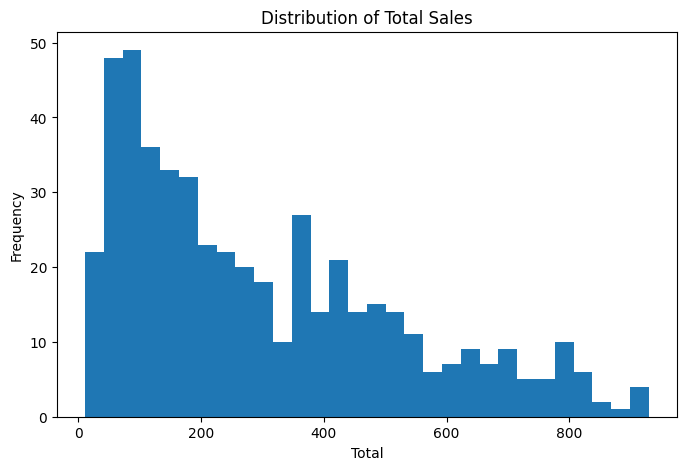

Observation: Check skewness and outliers in total sales.


In [37]:
#  Distribution of Total sales
plt.figure(figsize=(8,5))
plt.hist(df['Total'].dropna(), bins=30)
plt.title('Distribution of Total Sales')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()

print('Observation: Check skewness and outliers in total sales.')

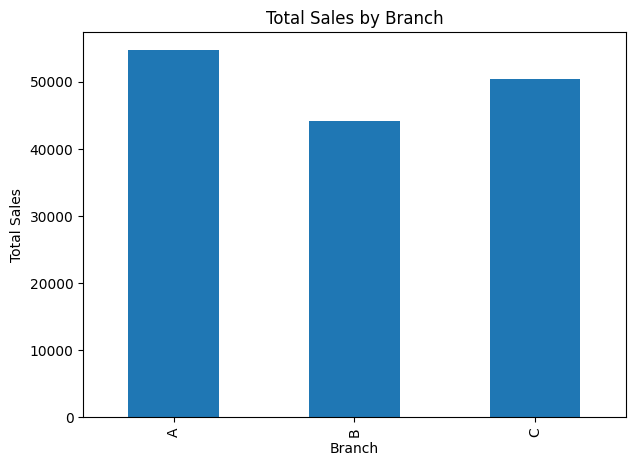

Observation: Compare branch performance.


In [38]:
#  Sales by Branch
plt.figure(figsize=(7,5))
df.groupby('Branch')['Total'].sum().plot(kind='bar')
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

print('Observation: Compare branch performance.')

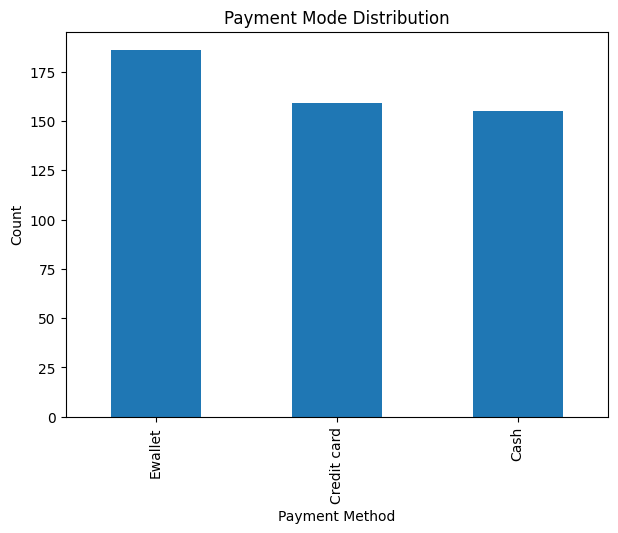

Observation: See which payment methods are most common.


In [39]:
#  Payment mode distribution
plt.figure(figsize=(7,5))
df['Payment'].value_counts().plot(kind='bar')
plt.title('Payment Mode Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

print('Observation: See which payment methods are most common.')

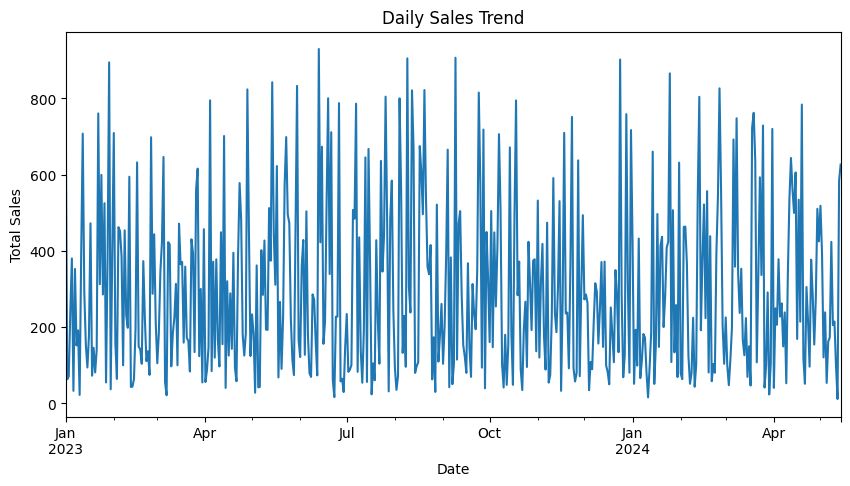

Observation: Look for seasonality or trends.


In [40]:
#  Daily sales trend
if 'Date' in df.columns:
    plt.figure(figsize=(10,5))
    df.groupby('Date')['Total'].sum().plot()
    plt.title('Daily Sales Trend')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.show()
    print('Observation: Look for seasonality or trends.')
else:
    print('Date column not found.')

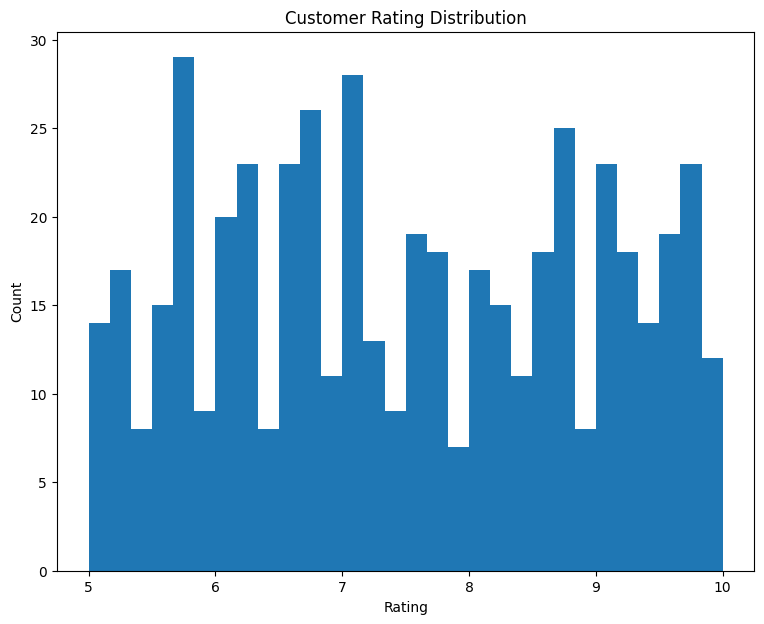

Observation: Customer satisfaction spread.


In [41]:
#  Rating distribution
plt.figure(figsize=(9,7))
plt.hist(df['Rating'].dropna(), bins=30)
plt.title('Customer Rating Distribution')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
print('Observation: Customer satisfaction spread.')

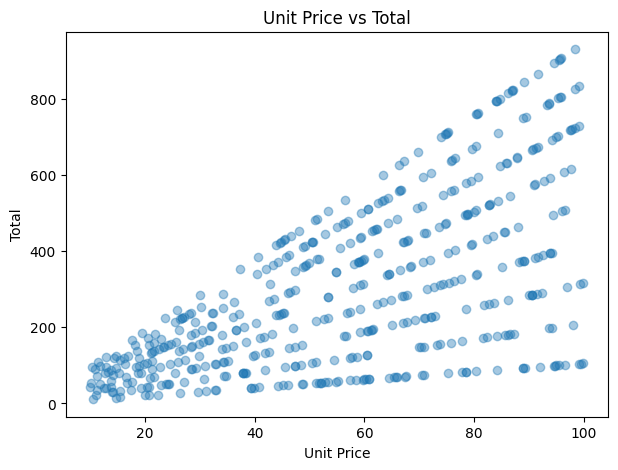

Observation: Relationship between unit price and basket total.


In [42]:
#  Unit Price vs Total scatter
plt.figure(figsize=(7,5))
plt.scatter(df['Unit Price'], df['Total'], alpha=0.4)
plt.title('Unit Price vs Total')
plt.xlabel('Unit Price')
plt.ylabel('Total')
plt.show()
print('Observation: Relationship between unit price and basket total.')

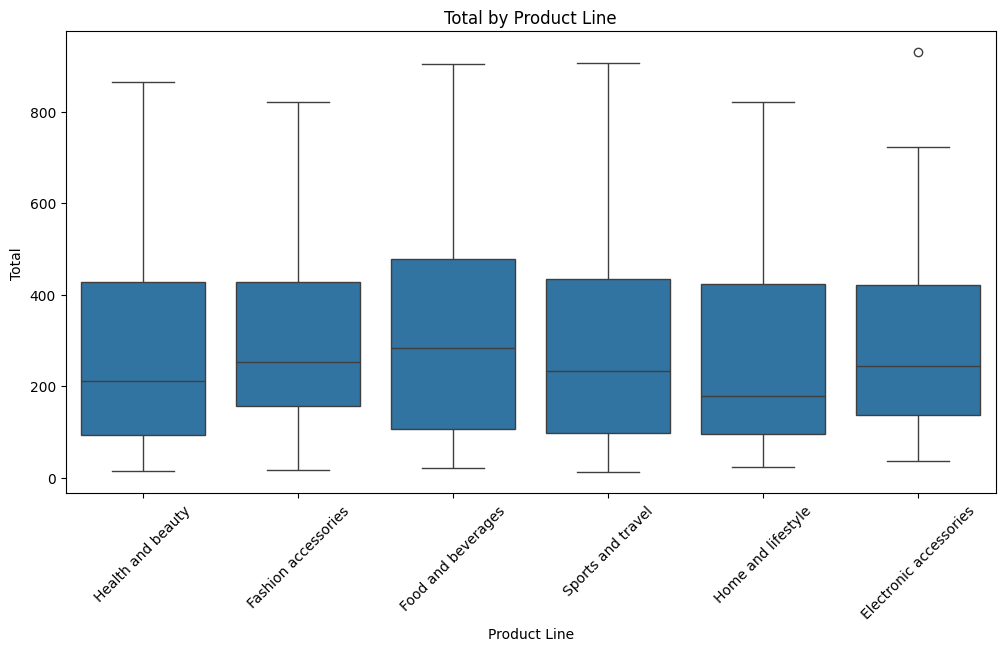

Observation: Identify which product lines have higher medians or more variance.


In [43]:
# Boxplot: Total by Product Line
plt.figure(figsize=(12,6))
sns.boxplot(x='Product Line', y='Total', data=df)
plt.xticks(rotation=45)
plt.title('Total by Product Line')
plt.show()
print('Observation: Identify which product lines have higher medians or more variance.')

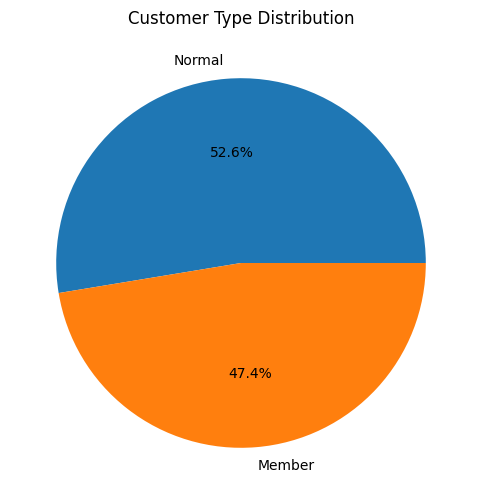

Observation: Proportion of Member vs Normal customers.


In [44]:
#  Customer Type distribution (pie)
plt.figure(figsize=(6,6))
df['Customer Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Type Distribution')
plt.ylabel('')
plt.show()
print('Observation: Proportion of Member vs Normal customers.')

## Summary

The analysis of the supermarket sales dataset shows that sales are mostly medium-range with a few high-value transactions. Branch B performs the best, and e-wallets are the most commonly used payment method. Customer ratings are generally high, indicating good satisfaction.

 Overall, the supermarket has stable sales and positive customer engagement.
